<a href="https://colab.research.google.com/github/PavankumarPandya14/CODSOFT/blob/main/TITANIC%20SURVIVAL%20PREDICTION/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC Data Classification Problem**

The Titanic dataset is one of the most well-known datasets in the machine learning community. It is often used for teaching data science and machine learning techniques due to its simplicity and historical significance. The dataset contains information about passengers on the Titanic, which sank after hitting an iceberg during its maiden voyage in 1912. The main goal when working with the Titanic dataset is to predict whether a passenger survived or not based on various features.

### Problem Statement

The primary task with the Titanic dataset is a binary classification problem. Given the features of the passengers, the goal is to predict whether each passenger survived (Survival = 1) or not (Survival = 0).

### Features in the Dataset

The dataset typically includes the following features:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: Survival status (0 = No, 1 = Yes) - this is the target variable.
3. **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
4. **Name**: Name of the passenger.
5. **Sex**: Gender of the passenger.
6. **Age**: Age of the passenger.
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
9. **Ticket**: Ticket number.
10. **Fare**: Fare paid for the ticket.
11. **Cabin**: Cabin number.
12. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Importing Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/PavankumarPandya14/CODSOFT/main/TITANIC%20SURVIVAL%20PREDICTION/DATASET/Titanic-Dataset.csv')

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Display the shape of the array to confirm
train_data.shape, test_data.shape

((623, 12), (268, 12))

The test data has been loaded into a NumPy array. It consists of 268 rows and 12 columns. This indicates 268 passengers in the test set with 12 features each.

Now that we have both datasets loaded, we can move on to next step, Exploring the data and writing insights. This involves analyzing the features, checking for missing values, understanding the distribution of different variables, etc.

Since we are working with numerical arrays, we'll need to remember the column indices for each feature. Alternatively, we can switch back to using the DataFrame format for easier data exploration and processing. DataFrames allow for more intuitive operations when dealing with tabular data.

# Steps to solve the problem

## Exploring the Data

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         1
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          499 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        139 non-null    object 
 11  Embarked     622 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,499.000000,623.000000,623.000000,623.000000
mean,446.581059,0.370787,2.341894,29.256353,0.576244,0.386838,31.840730
std,260.012799,0.483404,0.819945,14.558567,1.216267,0.807692,51.027372
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,454.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,675.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.750000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing Values:**

**Age**: 124 missing values.

**Cabin**: 484 missing values.

**Embarked**: 1 missing values.



**Summary Statistics for Numerical Features**


**PassengerId**: Ranges from 1 to 891 (as expected for 891 passengers).

**Survived**: About 37.08% of passengers in the training set survived.

**Pclass**: More passengers are in the 3rd class.

**Age**: The average age is approximately 29.3 years, with a wide range from 0.42 to 80 years.

**SibSp and Parch**: Majority of passengers do not have siblings/spouses or parents/children aboard.

**Fare**: Wide range in fares, indicating variation in passenger class and other factors.

The significant number of missing values in Age and Cabin needs to be addressed during data preprocessing. Embarked has a minimal number of missing values, which can be easily handled.

Next steps involve further exploration, such as analyzing categorical features, and understanding relationships between different features and survival.

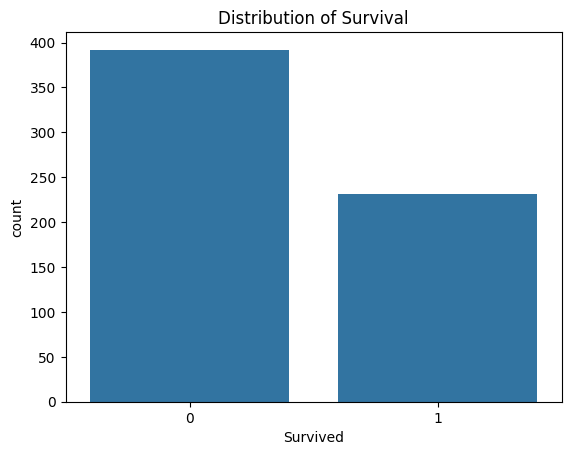

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survival')
plt.show()

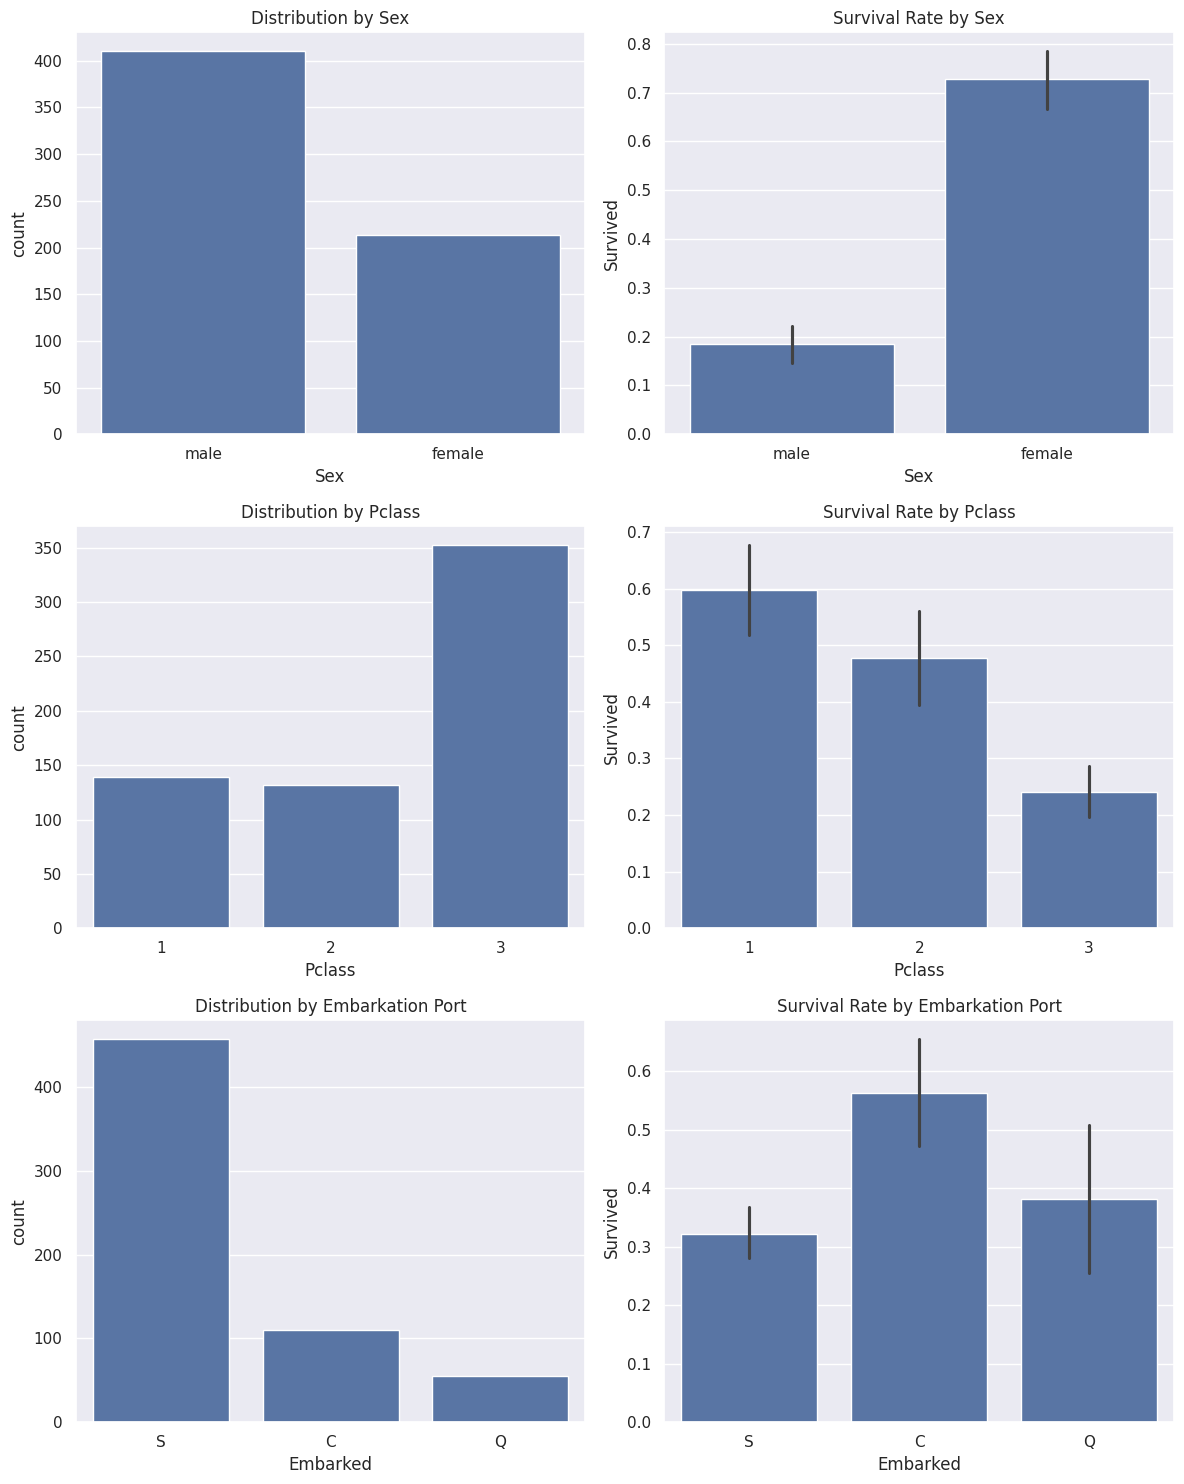

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Distribution of passengers by Sex
sns.countplot(x='Sex', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution by Sex')

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')

# Distribution of passengers by Pclass
sns.countplot(x='Pclass', data=train_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution by Pclass')

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Pclass')

# Distribution of passengers by Embarked
sns.countplot(x='Embarked', data=train_data, ax=axes[2, 0])
axes[2, 0].set_title('Distribution by Embarkation Port')

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data, ax=axes[2, 1])
axes[2, 1].set_title('Survival Rate by Embarkation Port')

# Display the plots
plt.tight_layout()
plt.show()

The visualizations provide a clear representation of the distributions and survival rates based on the categorical features:

Distribution by Sex and Survival Rate by Sex:

The first row of plots shows the distribution of passengers by sex and the corresponding survival rates.
It appears that there were more males than females on board, but females had a higher survival rate.
Distribution by Pclass and Survival Rate by Pclass:

The second row shows the distribution of passengers by class (Pclass) and the survival rates per class.
Most passengers were in the 3rd class. The survival rate was higher for passengers in the higher classes (1st and 2nd).
Distribution by Embarkation Port and Survival Rate by Embarkation Port:

The last row shows the distribution of passengers by their embarkation port and their survival rates.
The majority of passengers embarked from Southampton. The survival rate varied by embarkation port, with passengers embarked from Cherbourg having a higher survival rate.
These insights are crucial for understanding the factors that influenced survival on the Titanic. Next, we can move on to preparing the data for machine learning algorithms, which involves handling missing values, encoding categorical variables, and feature scaling.

## Preparing Data to better Explore Patterns

In [ ]:
# Dropping the 'Cabin' column
train_data = train_data.drop(columns=['Cabin','Name','Ticket'])

# Filling missing values in 'Age' with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Filling missing values in 'Embarked' with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Checking if there are any more missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

The missing values have been successfully handled:

The 'Cabin' column has been dropped.
Missing values in the 'Age' column have been filled with the median age.
Missing values in the 'Embarked' column have been filled with the most frequent value (mode).
Next, we'll move on to feature engineering, encoding categorical variables, and feature scaling.

Feature Engineering: We can create new features like 'FamilySize' from 'SibSp' (siblings/spouse aboard) and 'Parch' (parents/children aboard).
Encode Categorical Variables: Convert 'Sex' and 'Embarked' into numerical values.
Feature Scaling: Apply scaling to continuous features like 'Age' and 'Fare'.

In [ ]:
# Feature Engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Encoding categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature Scaling for 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

# Checking the modified dataframe
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
445,446,1,1,0,-1.919719,0,2,0.980998,0,3
650,651,0,3,0,-0.077252,0,0,-0.469634,0,1
172,173,1,3,1,-2.150028,1,1,-0.406136,0,3
450,451,0,2,0,0.536903,1,2,-0.080232,0,4
314,315,0,2,0,1.074289,1,1,-0.109651,0,3


## Exploring data using Logistic Regression and SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Splitting the data into features and target variable
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
# Function to perform cross-validation and print scores
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Model: {model} \n Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})\n")

In [ ]:
# Evaluating each model

for clf in {log_reg, svm_clf, rf_clf}:
  evaluate_model(clf, X, y)

Model: SVC(random_state=42) 
 Accuracy: 0.82 (+/- 0.08)

Model: RandomForestClassifier(random_state=42) 
 Accuracy: 0.79 (+/- 0.07)

Model: LogisticRegression(random_state=42) 
 Accuracy: 0.80 (+/- 0.10)



We will be performing hyperparameter tuning on Support Vector Classifier because it outperforms other models based on performance

## Finetuning the model

### Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization strength
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

# Setting up Grid Search with cross-validation
grid_search_svc = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

# Performing Grid Search
grid_search_svc.fit(X, y)

# Best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_svc, best_score_svc

({'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.8218322580645163)

## Saving the model

In [ ]:
from joblib import dump, load
dump(grid_search_svc, 'model.joblib')

['model.joblib']

## Loading the model

In [ ]:
grid_search_svc = load('model.joblib')

## Preprocessing the Test data

In [ ]:
test_data.drop(columns=['Cabin','Name','Ticket', 'PassengerId'], axis=1, inplace=True) # dropping Cabin and other columns

In [ ]:
test_data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         53
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [ ]:
# Filling missing values in 'Age' with the median age
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Checking if there are any more missing values
test_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
dtype: int64

In [ ]:
# Dropping missing values in 'Embarked'
test_data.dropna(subset=['Embarked'], inplace=True)

# Checking if there are any more missing values
test_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
y = test_data['Survived'] # Storing test labels in y
test_data.drop(['Survived'], axis=1, inplace=True) # Dropping test labels from test data

In [ ]:
# Feature Engineering
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Encoding categorical variables
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature Scaling for 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

# Checking the modified dataframe
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
709,3,0,-0.099021,1,1,-0.379602,1,3
439,2,0,0.057305,0,0,-0.481801,0,1
840,3,0,-0.802483,0,0,-0.537253,0,1
720,2,1,-1.896759,0,1,0.002728,0,2
39,3,1,-1.271459,1,0,-0.465829,1,2


In [ ]:
predictions = grid_search_svc.predict(test_data)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.65      0.73       110

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



## Making Predictions

In [ ]:
prediction  = grid_search_svc.predict([[1,1,0.1,1,0.05,1,1,2]])
if prediction==0:
  print("Did not survive")
else:
  print("Survived")

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Conclusion

While the specific problem of predicting survival on the Titanic is historical and not directly applicable to modern scenarios, the skills and techniques learned from working with this dataset are broadly applicable:

1. **Customer Segmentation**: Understanding how to segment customers based on various attributes to predict their behavior.
2. **Risk Assessment**: Assessing risk in various domains, such as finance (credit scoring) or healthcare (predicting patient outcomes).
3. **Classification Problems**: Applying binary classification techniques to any problem where the goal is to predict one of two outcomes.
4. **Data Cleaning and Preparation**: Learning how to handle missing values, outliers, and data inconsistencies.
5. **Feature Engineering**: Creating new features that can help improve model performance.
6. **Model Evaluation**: Using metrics like accuracy, precision, recall, and F1-score to evaluate model performance.

### **Author**
Pavankumar Pandya